Architecture 400-350-150-75
With Padding, Batchnormalization and Dropout

Import the important libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D, ZeroPadding2D, Conv2D

Import the data of training and testing from the library

In [43]:
# Input data files are available in the "../input/" directory.
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")

Check the shape of the training and testing data 

In [44]:
train.shape, test.shape

((42000, 785), (28000, 784))

In [45]:
train.head()
# test.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Splitting the data into X and y(i.e independent and dependent varaible in simple terms)

In [46]:
X=train.drop(['label'], axis=1)
y=train['label']

X.shape, y.shape

((42000, 784), (42000,))

Now let us check whether the target variable is imbalanced or not in the training data

In [47]:
# checking manually
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

Plotting the same

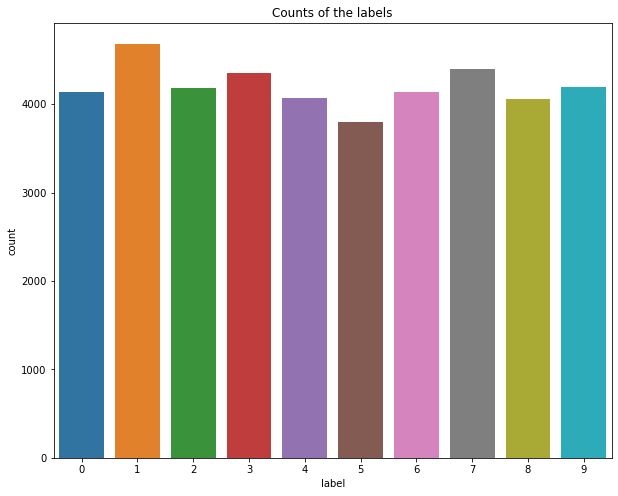

In [48]:
plt.subplots(figsize=(10,8))
plt.title('Counts of the labels')
sns.countplot(x=y)
plt.show()

We can easily conclude from the above that the data is not unbalanced

Now we will split the data into training and testing

In [49]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1, random_state=99)
# check the shape now
X_train.shape,X_val.shape,y_train.shape,y_val.shape,test.shape

((37800, 784), (4200, 784), (37800,), (4200,), (28000, 784))

Here the shape of our data is not according to the CNN architecture, so we will reshape the data into CNN architecture that is (images,rows,cols,channels) Here the images will be the no of the images used , rows and columns will be the pixels of the images mentioned in the dataset descriptions which are 28 * 28 . since all images are gray scale so it will only use '1' channel

Here we first we will convert the values of the data into float32, by which the three dataframes will get converted into a numpy array

In [50]:
X_train=X_train.values.astype('float32')
X_val=X_val.values.astype('float32')
test=test.values.astype('float32')

In [51]:
# changing the shape of X_train and y_train and test also
X_train=X_train.reshape(X_train.shape[0], 28, 28, 1)
X_val=X_val.reshape(X_val.shape[0], 28, 28, 1)
test=test.reshape(test.shape[0] , 28 , 28 , 1)

Now check the shape again

In [52]:
X_train.shape,X_val.shape,test.shape

((37800, 28, 28, 1), (4200, 28, 28, 1), (28000, 28, 28, 1))

In [53]:
# check the maximum values in the dataset
X_train.max(),X_train.min()

(255.0, 0.0)

We can easily that the data range is between 0 to 255, here we need to normalize the data to bring it into the range of 0 to 1 so that our model predicts the data more efficiently

In [54]:
X_train=X_train/255
X_val=X_val/255
test=test/255

In [55]:
# check the maximum values in the dataset
X_train.max(),X_train.min()

(1.0, 0.0)

Now our data has been normalized, we can also scale the data by using MinMaxScaler as well as Standard Scaler

**Now we will Build the Model**

Before building the model here we will need to pass the input shape

In [56]:
input_shape=X_train[0].shape
input_shape

(28, 28, 1)

In [57]:
model = Sequential()
model.add(Conv2D(100,kernel_size=(3, 3), activation='relu',padding='same', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


# model.add(Conv2D(350, kernel_size=(5, 5),activation='relu',padding='same') )
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))


# model.add(Conv2D(150, kernel_size=(5, 5),activation='relu',padding='same') )
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(BatchNormalization())
# model.add(Dropout(0.2))

model.add(Conv2D(50, kernel_size=(3, 3),activation='relu',padding='same') )
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [58]:
# check the summary[":"]
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 100)       1000      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 100)       0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 100)       400       
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 100)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 50)        45050     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 7, 7, 50)         

Compile the model

In [59]:
model.compile(optimizer= 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Fitting the model

In [60]:
%%time
history=model.fit(X_train, y_train, batch_size=60, epochs=10, verbose=1, validation_data=(X_val,y_val))

Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 58s 2ms/sample - loss: 0.4474 - accuracy: 0.8583 - val_loss: 0.1163 - val_accuracy: 0.9681
Epoch 2/10
37800/37800 [==============================] - 58s 2ms/sample - loss: 0.1772 - accuracy: 0.9456 - val_loss: 0.0670 - val_accuracy: 0.9810
Epoch 3/10
37800/37800 [==============================] - 58s 2ms/sample - loss: 0.1414 - accuracy: 0.9563 - val_loss: 0.0818 - val_accuracy: 0.9757
Epoch 4/10
37800/37800 [==============================] - 57s 2ms/sample - loss: 0.1223 - accuracy: 0.9637 - val_loss: 0.0518 - val_accuracy: 0.9852
Epoch 5/10
37800/37800 [==============================] - 57s 2ms/sample - loss: 0.1109 - accuracy: 0.9672 - val_loss: 0.0561 - val_accuracy: 0.9831
Epoch 6/10
37800/37800 [==============================] - 61s 2ms/sample - loss: 0.0980 - accuracy: 0.9711 - val_loss: 0.0409 - val_accuracy: 0.9895
Epoch 7/10
37800/37800 [==============================] -

Evaluate the model

In [61]:
# evaluating the model with testing data
loss, accuracy=model.evaluate(X_val,y_val)
loss, accuracy

4200/4200 [==============================] - 2s 441us/sample - loss: 0.0510 - accuracy: 0.9886


(0.05096607932838933, 0.9885714)

We will plot the data

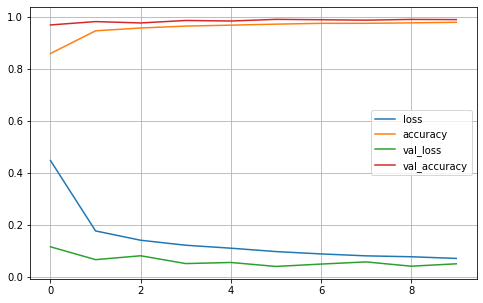

In [62]:
# plot the figure now
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

Making the prediction using the model

In [63]:
# plot confusion matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [64]:
y_pred = model.predict_classes(test)

In [65]:
y_pred

array([2, 0, 9, ..., 3, 9, 2])

In [66]:
class_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

(<Figure size 504x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f467a8ab1d0>)

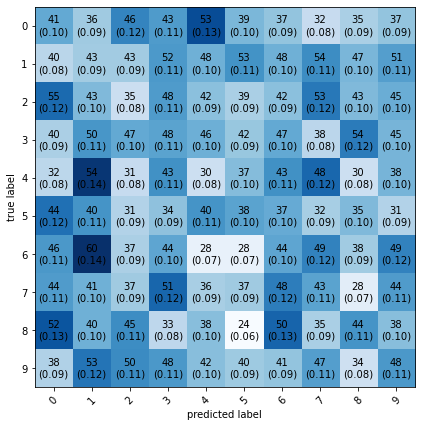

In [67]:
mat=confusion_matrix(y_val, y_pred[:4200])
plot_confusion_matrix(conf_mat=mat, class_names= class_names,show_normed=True, figsize=(7,7))

In [68]:
# predict results
results = model.predict(test)


In [69]:
results

array([[4.75314343e-10, 2.05929588e-12, 1.00000000e+00, ...,
        1.06026625e-10, 8.94825772e-13, 6.36563556e-15],
       [1.00000000e+00, 2.93728072e-15, 5.42454645e-13, ...,
        2.03823944e-10, 1.90798523e-11, 6.70051029e-11],
       [3.87191668e-12, 1.51093582e-11, 1.04207948e-10, ...,
        4.97547762e-06, 1.16169599e-06, 9.99973059e-01],
       ...,
       [7.24602347e-24, 9.12313958e-18, 5.13008386e-12, ...,
        2.89881678e-11, 5.82114552e-16, 8.26841308e-14],
       [6.34384412e-09, 1.69778724e-09, 3.76850195e-09, ...,
        9.15633063e-05, 8.63276341e-07, 9.97248709e-01],
       [3.13564626e-12, 1.25857267e-12, 1.00000000e+00, ...,
        7.26642982e-11, 7.04827776e-12, 1.20824811e-14]], dtype=float32)

In [70]:

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)



In [71]:
results

array([2, 0, 9, ..., 3, 9, 2])

In [72]:
results = pd.Series(results,name="Label")

In [73]:
results

0        2
1        0
2        9
3        9
4        3
        ..
27995    9
27996    7
27997    3
27998    9
27999    2
Name: Label, Length: 28000, dtype: int64

In [74]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)



In [75]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
submission.to_csv("submission.csv",index=False)